### Import libraries

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import yaml

### Create directory structure

In [ ]:
!mkdir -p data

!mkdir -p experiments
!touch experiments/__init__.py
!mkdir -p experiments/transformers
!touch experiments/transformers/__init__.py
!mkdir -p experiments/classifiers
!touch experiments/classifiers/__init__.py

### Download the dataset

In [27]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ycVZxj_O_nUAa7lc-Dg5nwBPbDHonfOM' -O "data/california_housing.csv"

--2023-12-11 19:15:52--  https://docs.google.com/uc?export=download&id=1ycVZxj_O_nUAa7lc-Dg5nwBPbDHonfOM
Resolving docs.google.com (docs.google.com)... 2a00:1450:4003:806::200e, 216.58.215.174
Connecting to docs.google.com (docs.google.com)|2a00:1450:4003:806::200e|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3poi15vb4re23711vdpihh5i5dd8m65o/1702318500000/17600825180070349509/*/1ycVZxj_O_nUAa7lc-Dg5nwBPbDHonfOM?e=download&uuid=aa36a7e1-036e-45a3-af76-c05636f3d721 [following]
--2023-12-11 19:15:53--  https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3poi15vb4re23711vdpihh5i5dd8m65o/1702318500000/17600825180070349509/*/1ycVZxj_O_nUAa7lc-Dg5nwBPbDHonfOM?e=download&uuid=aa36a7e1-036e-45a3-af76-c05636f3d721
Resolving doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleusercontent.com)... 2a00:1450:4003:80d::2001, 1

### Load the dataset into a pandas dataframe

In [76]:
california_housing_df = pd.read_csv("data/california_housing.csv")

california_housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Add a yaml description of the dataset

In [30]:
yaml_content = {
    'name': 'California Housing Dataframe',
    'description': 'This is a dataframe containing the California Housing dataset.',
    'num_rows': len(california_housing_df),
    'num_columns': len(california_housing_df.columns),
    'columns': list(california_housing_df.columns)
}

with open('data/california_housing.desc.yaml', 'w') as file:
    yaml.dump(yaml_content, file, sort_keys=False)

### Describe and get info about the data

In [31]:
california_housing_df.info()

california_housing_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Make pair plot of data columns

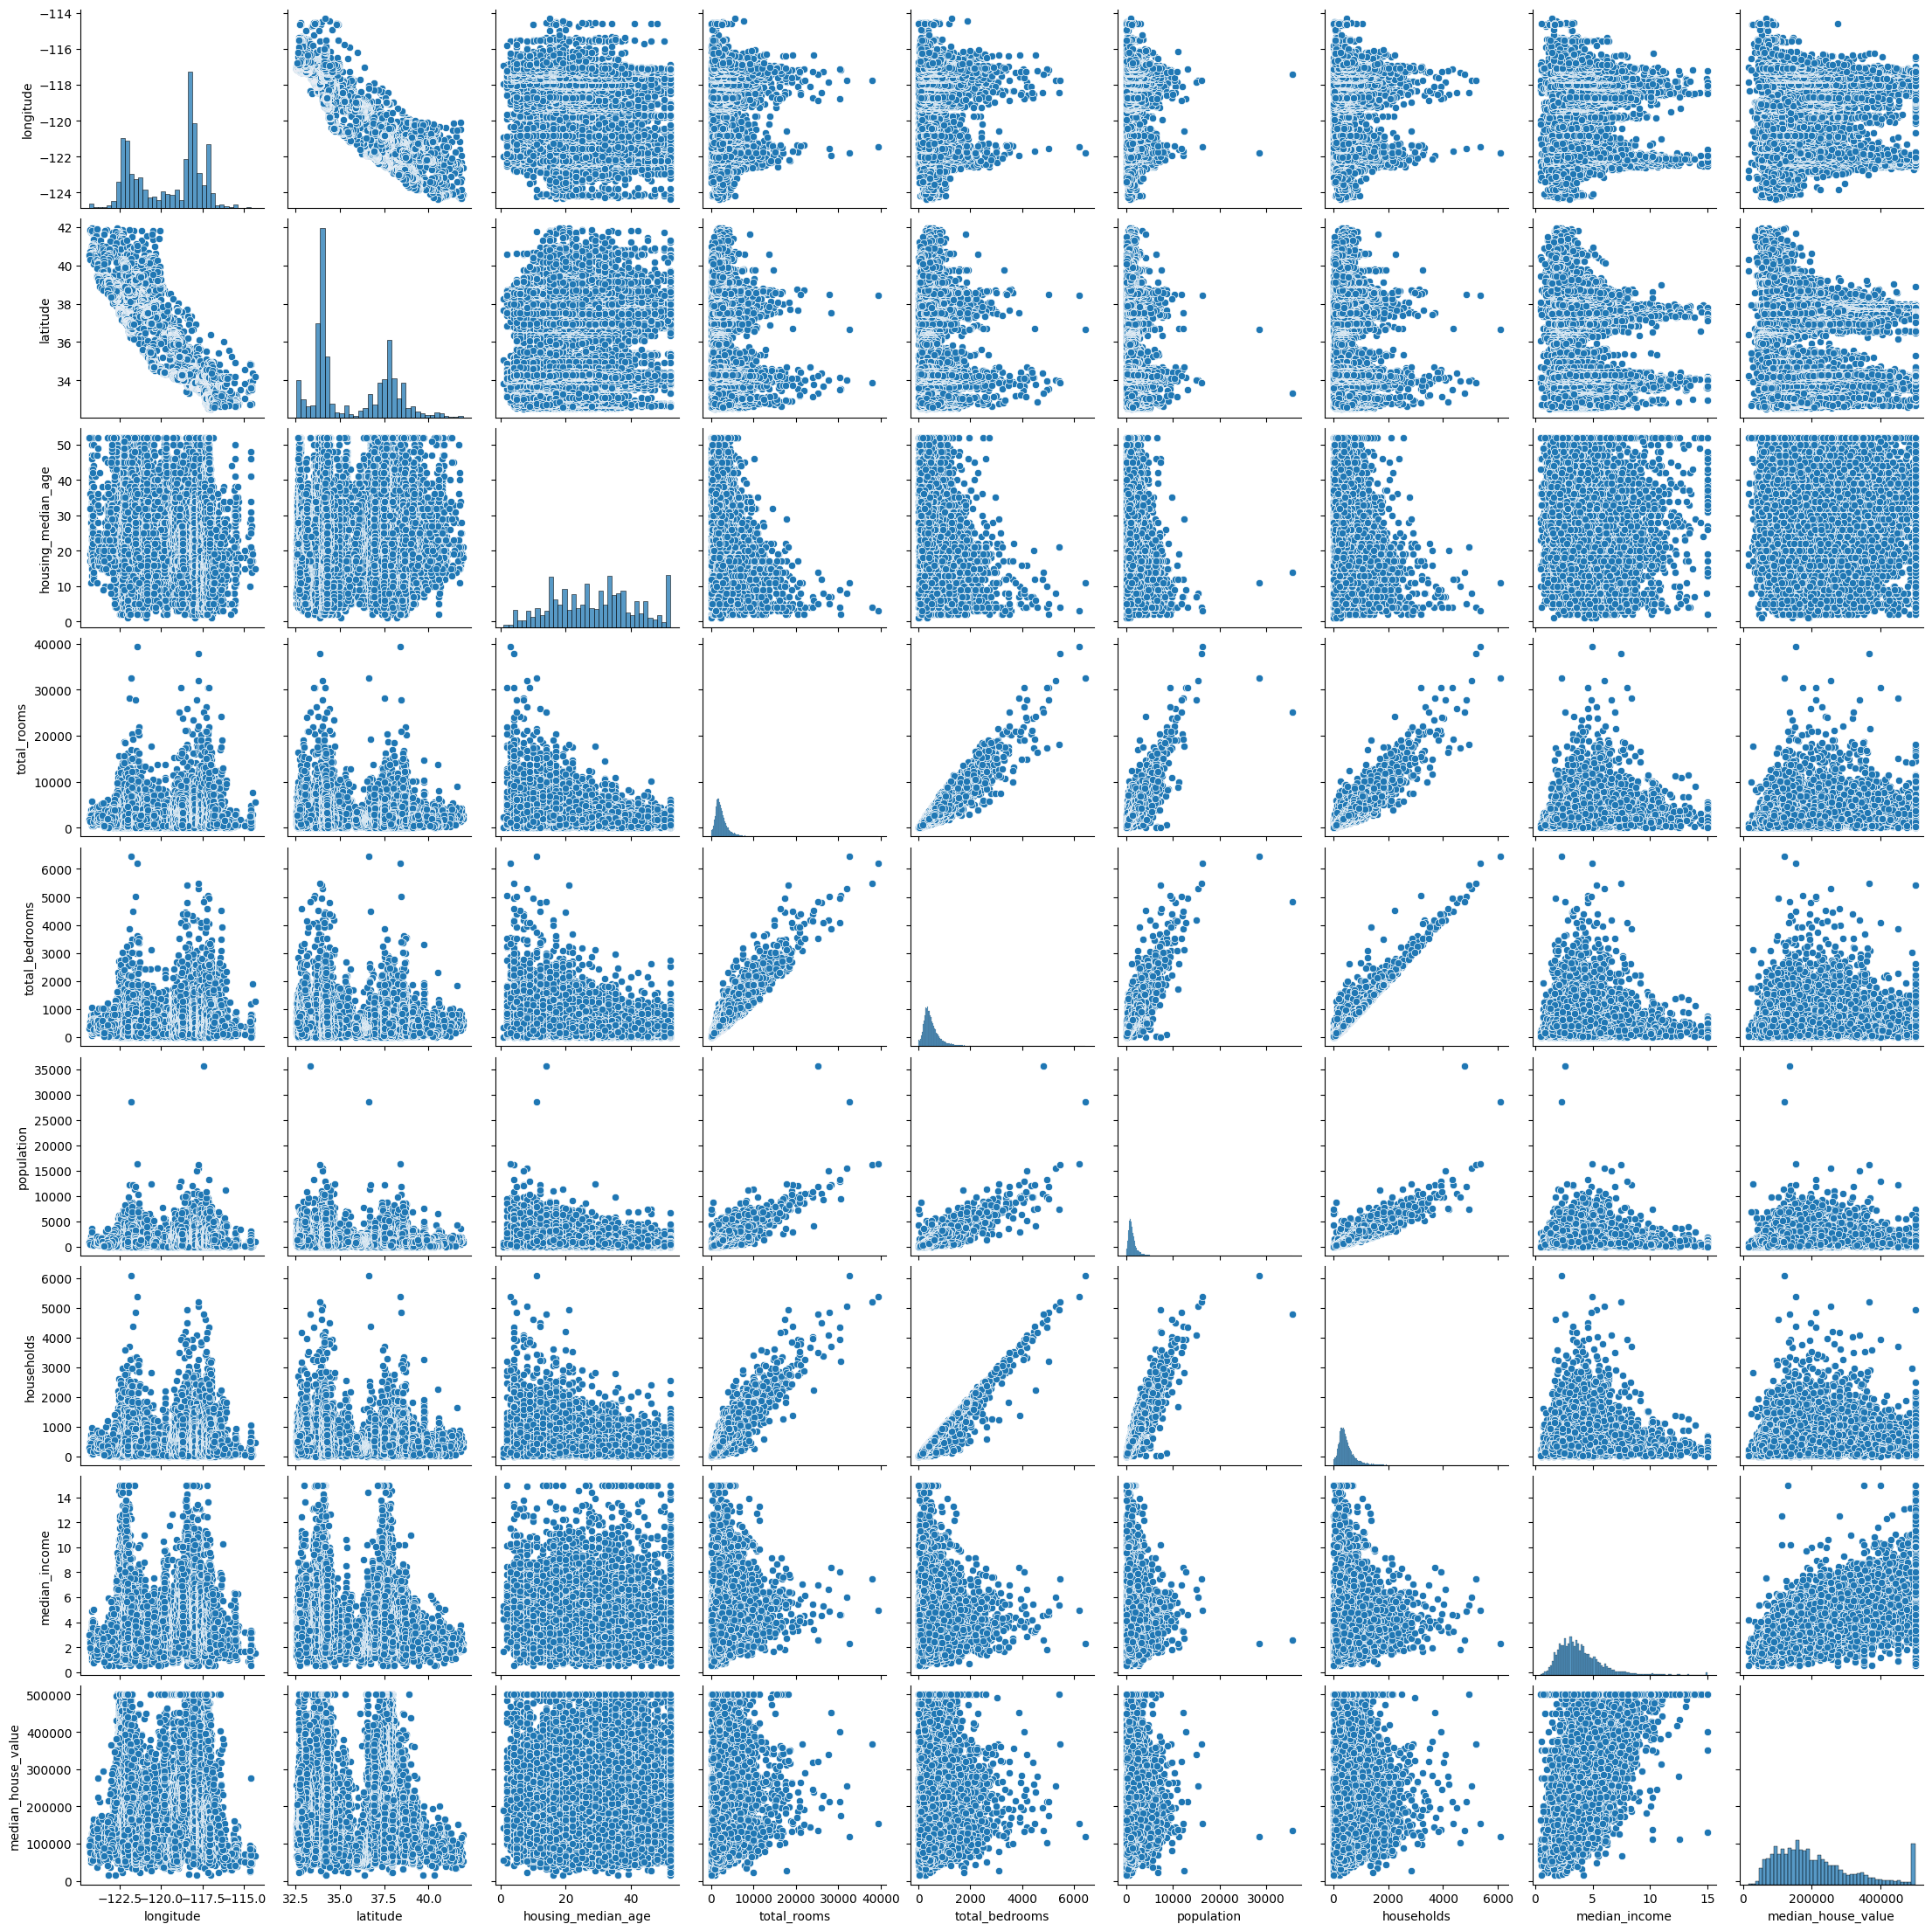

In [32]:
sns.pairplot(california_housing_df)

### Add log transform of data columns

In [87]:
california_housing_with_log_df = california_housing_df.copy()

log_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for col in log_cols:
    california_housing_with_log_df[f"log_{col}"] = np.log(california_housing_with_log_df[col])

california_housing_with_log_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,log_housing_median_age,log_total_rooms,log_total_bedrooms,log_population,log_households,log_median_income,log_median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.713572,6.779922,4.859812,5.774552,4.836282,2.119287,13.022764
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.044522,8.867709,7.008505,7.783641,7.037028,2.116424,12.789684
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.951244,7.290975,5.247024,6.206576,5.176150,1.982022,12.771671
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.951244,7.149917,5.459586,6.324359,5.389072,1.730434,12.740517
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.951244,7.394493,5.634790,6.336826,5.556828,1.347086,12.743151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,3.218876,7.417580,5.924256,6.739337,5.799093,0.444878,11.265745
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2.890372,6.546785,5.010635,5.874931,4.736198,0.938756,11.252859
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2.833213,7.720462,6.184149,6.914731,6.070738,0.530628,11.432799
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2.890372,7.528332,6.013715,6.608001,5.855072,0.624440,11.346871


### Analyze geographic distribution of the data

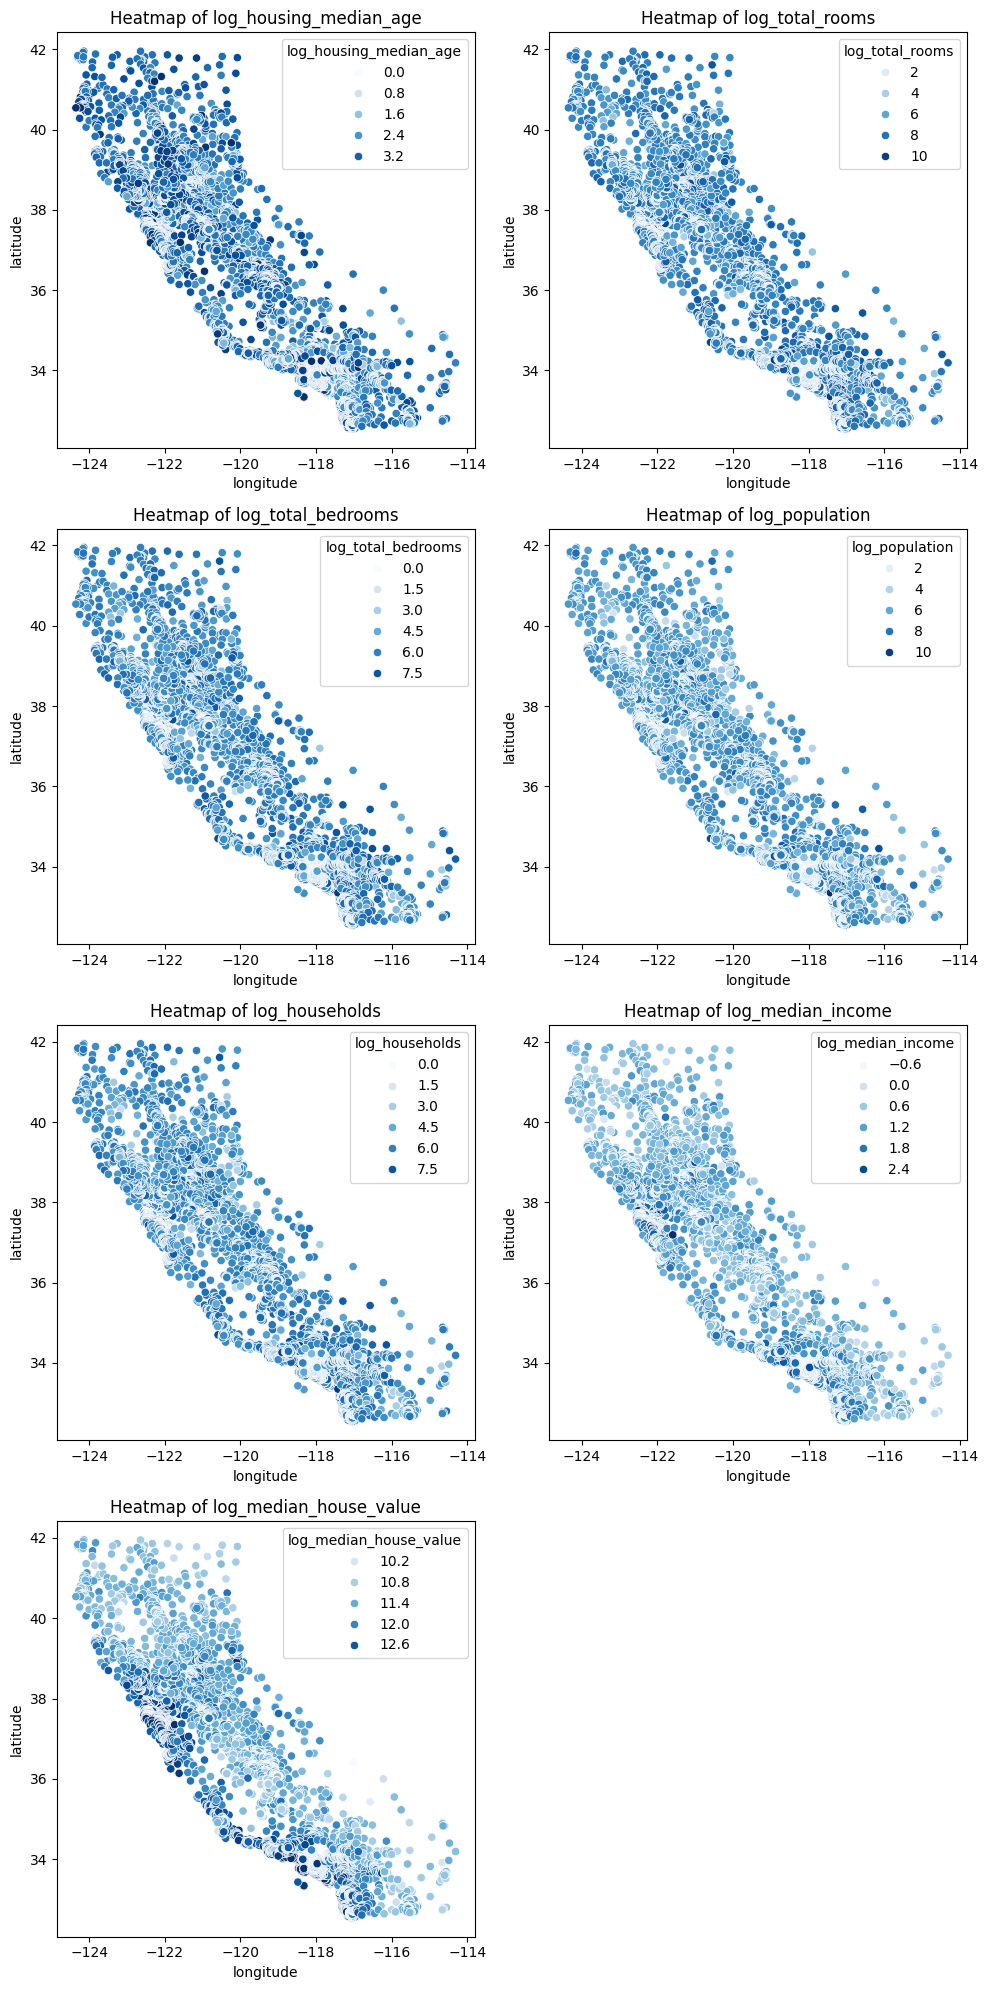

In [101]:
plt.figure(figsize=(10, 20))

for i, col in enumerate(log_cols):

    plt.subplot(4, 2, i + 1)
    sns.scatterplot(data=california_housing_with_log_df, x='longitude', y='latitude', hue='log_' + col, palette='Blues')
    plt.title('Heatmap of ' + 'log_' + col)
    plt.xlabel('longitude')
    plt.ylabel('latitude')

plt.tight_layout()
plt.show()

### Analyze the distribution of the Median House Value with respect to Ocean Proximity

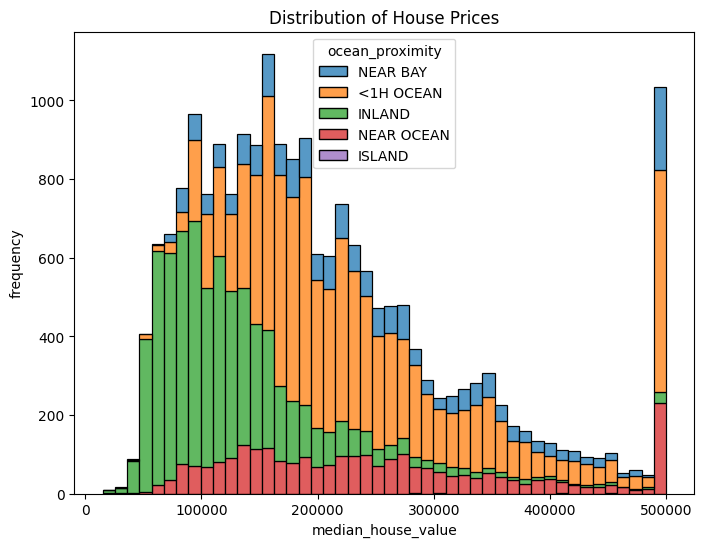

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=california_housing_df, x="median_house_value", hue="ocean_proximity", multiple="stack")
plt.title("Distribution of House Prices")
plt.xlabel("median_house_value")
plt.ylabel("frequency")
plt.show()